In [1]:
#importing Libraries
import tensorflow as tf
import os
import pandas as pd

In [2]:
#importing the zip file

In [3]:
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

In [4]:
%cd ~/.keras
%pwd

/root/.keras


'/root/.keras'

In [5]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip',origin=url,extract=True)

68606236/68606236 [==============================] - 0s 0us/step


In [6]:
%ls
%cd datasets
%ls

datasets/  keras.json
/root/.keras/datasets
cats_and_dogs_filtered/  cats_and_dogs_filtered.zip


In [7]:
%cd cats_and_dogs_filtered

/root/.keras/datasets/cats_and_dogs_filtered


In [8]:
%ls

train/  validation/  vectorize.py


In [9]:
%cd /content

/content


In [10]:
!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
!unzip /content/cats_and_dogs_filtered.zip

--2023-02-04 12:14:37--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.63.128, 142.251.163.128, 142.251.16.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.63.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   188MB/s    in 0.3s    

2023-02-04 12:14:38 (188 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/d

In [11]:
%cd /content/cats_and_dogs_filtered/train/cats

/content/cats_and_dogs_filtered/train/cats


In [12]:
%pwd

'/content/cats_and_dogs_filtered/train/cats'

In [13]:
dir_dataset = '/content/cats_and_dogs_filtered'
train_dir = os.path.join(dir_dataset,'train')
val_dir = os.path.join(dir_dataset,'validation')
train_cat_dir = os.path.join(train_dir,'cats')
train_dog_dir = os.path.join(train_dir,'dogs')
val_cat_dir = os.path.join(val_dir,'cats')
val_dog_dir = os.path.join(val_dir,'dogs')
print(train_cat_dir,train_dog_dir,val_cat_dir,val_dog_dir)

/content/cats_and_dogs_filtered/train/cats /content/cats_and_dogs_filtered/train/dogs /content/cats_and_dogs_filtered/validation/cats /content/cats_and_dogs_filtered/validation/dogs


In [14]:
train_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
val_img_gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
train_data_gen = train_img_gen.flow_from_directory(train_dir,target_size=(150,150),class_mode='binary')
val_data_gen = val_img_gen.flow_from_directory(val_dir,target_size=(150,150),class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
train_data_gen.image_shape

(150, 150, 3)

In [ ]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir,image_size=(150,150))
class_names = train_ds.class_names
print(class_names)

Found 2000 files belonging to 2 classes.
['cats', 'dogs']


In [ ]:
#Cnn Model
cnn=tf.keras.Sequential()
cnn.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(2,2))

cnn.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(2,2))

cnn.add(tf.keras.layers.Conv2D(128,(3,3),activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(2,2))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(128,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1))
cnn.add(tf.keras.layers.Dense(64,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.1))
cnn.add(tf.keras.layers.Dense(1,activation='sigmoid'))
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 72, 72, 64)       256       
 hNormalization)                                                 
                                                        

In [ ]:
history = cnn.fit_generator(train_data_gen, epochs=100,validation_data=val_data_gen)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/100
63/63 [==============================] - 23s 150ms/step - loss: 1.8921 - accuracy: 0.5455 - val_loss: 2.1160 - val_accuracy: 0.5020
Epoch 2/100
63/63 [==============================] - 9s 140ms/step - loss: 1.0579 - accuracy: 0.6055 - val_loss: 1.3344 - val_accuracy: 0.5010
Epoch 3/100
63/63 [==============================] - 9s 141ms/step - loss: 0.7821 - accuracy: 0.6310 - val_loss: 1.0757 - val_accuracy: 0.5070
Epoch 4/100
63/63 [==============================] - 9s 141ms/step - loss: 0.6220 - accuracy: 0.7000 - val_loss: 0.7455 - val_accuracy: 0.6090
Epoch 5/100
63/63 [==============================] - 10s 162ms/step - loss: 0.5380 - accuracy: 0.7390 - val_loss: 1.0751 - val_accuracy: 0.5930
Epoch 6/100
63/63 [==============================] - 9s 148ms/step - loss: 0.4464 - accuracy: 0.7940 - val_loss: 0.9123 - val_accuracy: 0.6060
Epoch 7/100
63/63 [==============================] - 12s 185ms/step - loss: 0.3318 - accuracy: 0.8530 - val_loss: 0.9226 - val_accuracy: 0.6

In [ ]:
# Preprocessing- generators and rescaling

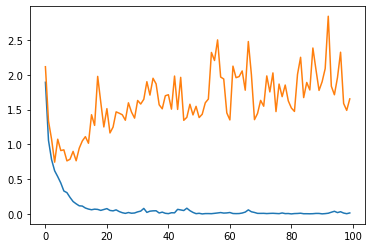

In [ ]:
#visualization of model
pd.Series(history.history['loss']).plot()
pd.Series(history.history['val_loss']).plot()

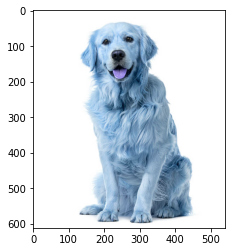

In [ ]:
#Prediction
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
test_img=cv2.imread('/content/dog1.jpg')
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
cnn.predict(test_input)

array([[1.]], dtype=float32)

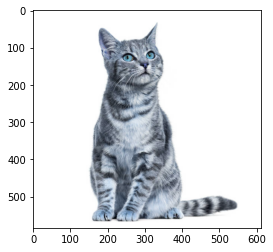

In [ ]:
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
test_img=cv2.imread('/content/cat.jpg')
plt.imshow(test_img)

In [ ]:
test_img=cv2.resize(test_img,(150,150))
test_input=test_img.reshape((1,150,150,3))
cnn.predict(test_input)

array([[5.718395e-08]], dtype=float32)